<a href="https://colab.research.google.com/github/Harshbhatt2409/Mining-Big-Data-/blob/main/(a1872953)_(Harsh_Alpesh_Bhatt)_assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1: Machine Learning Methods

### \<Harsh Alpesh Bhatt> \<a1872953>

#### How can we use data analytics to predict energy usage for this house?




### 1. Read the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/energydata_complete-1.csv')

### 2. Analyse and visualise the data

In [ ]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [ ]:
df.shape

(19735, 29)

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

The dataset has 29 columns. With one column being of object type(date), 2 being int type(appliances and lights) and rest being float type.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [ ]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

No null values in all dataset


Categorical Variables

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['date']


Numerical Variables

In [ ]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 2 numerical variables

The numerical variables are :

 ['Appliances', 'lights']


In [ ]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='float64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 26 numerical variables

The numerical variables are :

 ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


<ipython-input-12-8b0bb5acb725>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Appliances'])


<Axes: xlabel='Appliances', ylabel='Density'>

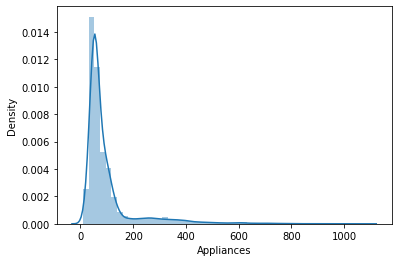

In [ ]:
sns.distplot(df['Appliances'])

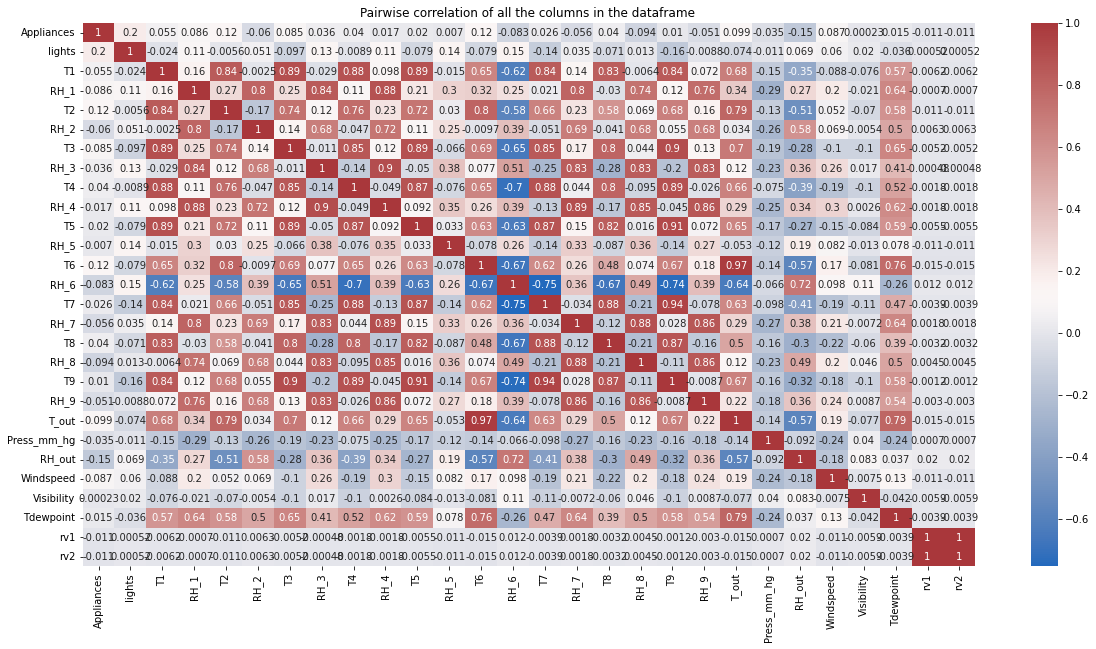

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data= df.corr(), cmap="vlag", annot= True)
plt.title("Pairwise correlation of all the columns in the dataframe ")
plt.show()

<Axes: xlabel='date'>

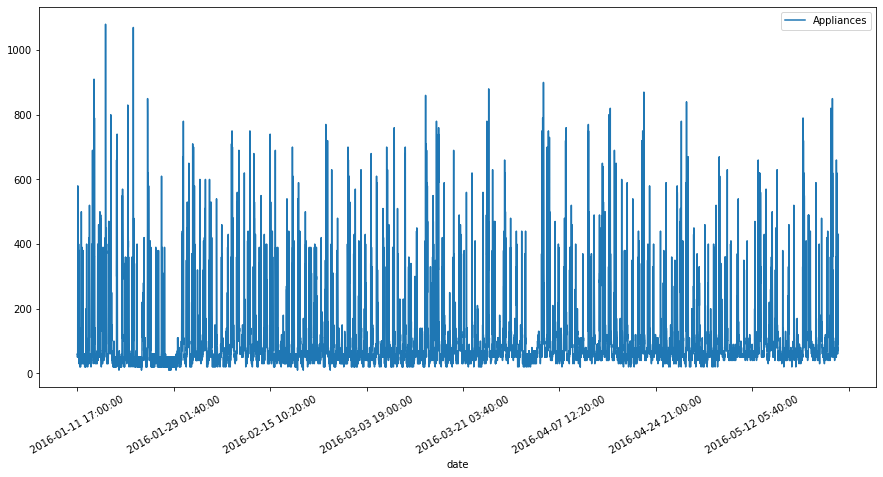

In [ ]:
df.plot(x='date', y='Appliances',figsize=(15,7), rot=30)

This is a regression problem where we aim is to predict the energy consumption from the house with the help of data collected from the sensors.
We can eliminate the "Date" attribute and convert it to its smaller form representing month, weekday, hour and week

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['month'] = df.date.dt.month
df['weekday'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['week'] = df.date.dt.week

<ipython-input-16-77fee5deefc5>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df.date.dt.week


In [ ]:
df.drop(columns=['date'], inplace=True)

#Data Observations so far:
1. This dataset contains 29 variables and there are no null values
2. We will not be taking "Date" attribute into account as this is a regression problem.
3. Variables T1 to T9 are Temperature Sensors and T_out is Temperature Outside the house (From Chievres weather station).
4. Variables RH_1 to RH_9 are Humidity sensors and RH_out is the humidity outside the house (From Chievres weather station).
5. This dataset also has other variables like Appliances: Energy use in Wh by the appliances in the house, lights: Energy used by lights in the house, Windspeed: in m/s (from Chievres weather station), Visibility: in km (from Chievres weather station), Tdewpoint: A^ degree C (from Chievres weather station).
6. This dataset also has two random variables namely rv1 and rv2. If no relation is found then we will drop this variables.
7. Our Target Variable for the given dataset will be "Appliance", which counts the Energy use in Wh which we want to predict as our outcome.

The Dataset can be split into 6 attributes that would sum up our Dataset.
1. Humidity_columns
2. Temperature_columns
3. Weather_columns
4. Light_columns
5. Random_columns
6. Date_Time_columns

Now we will try and find the relation of these columns with our target variable "Appliance"

In [ ]:
# Segregrating the columns based on category
Humidity_columns = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
Temperature_columns = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
Weather_columns = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"]
Light_columns = ["lights"]
Random_columns = ["rv1", "rv2"]
Date_Time_columns = ['month', 'weekday', 'hour', 'week']
Target = ["Appliances"]

Pairplotting

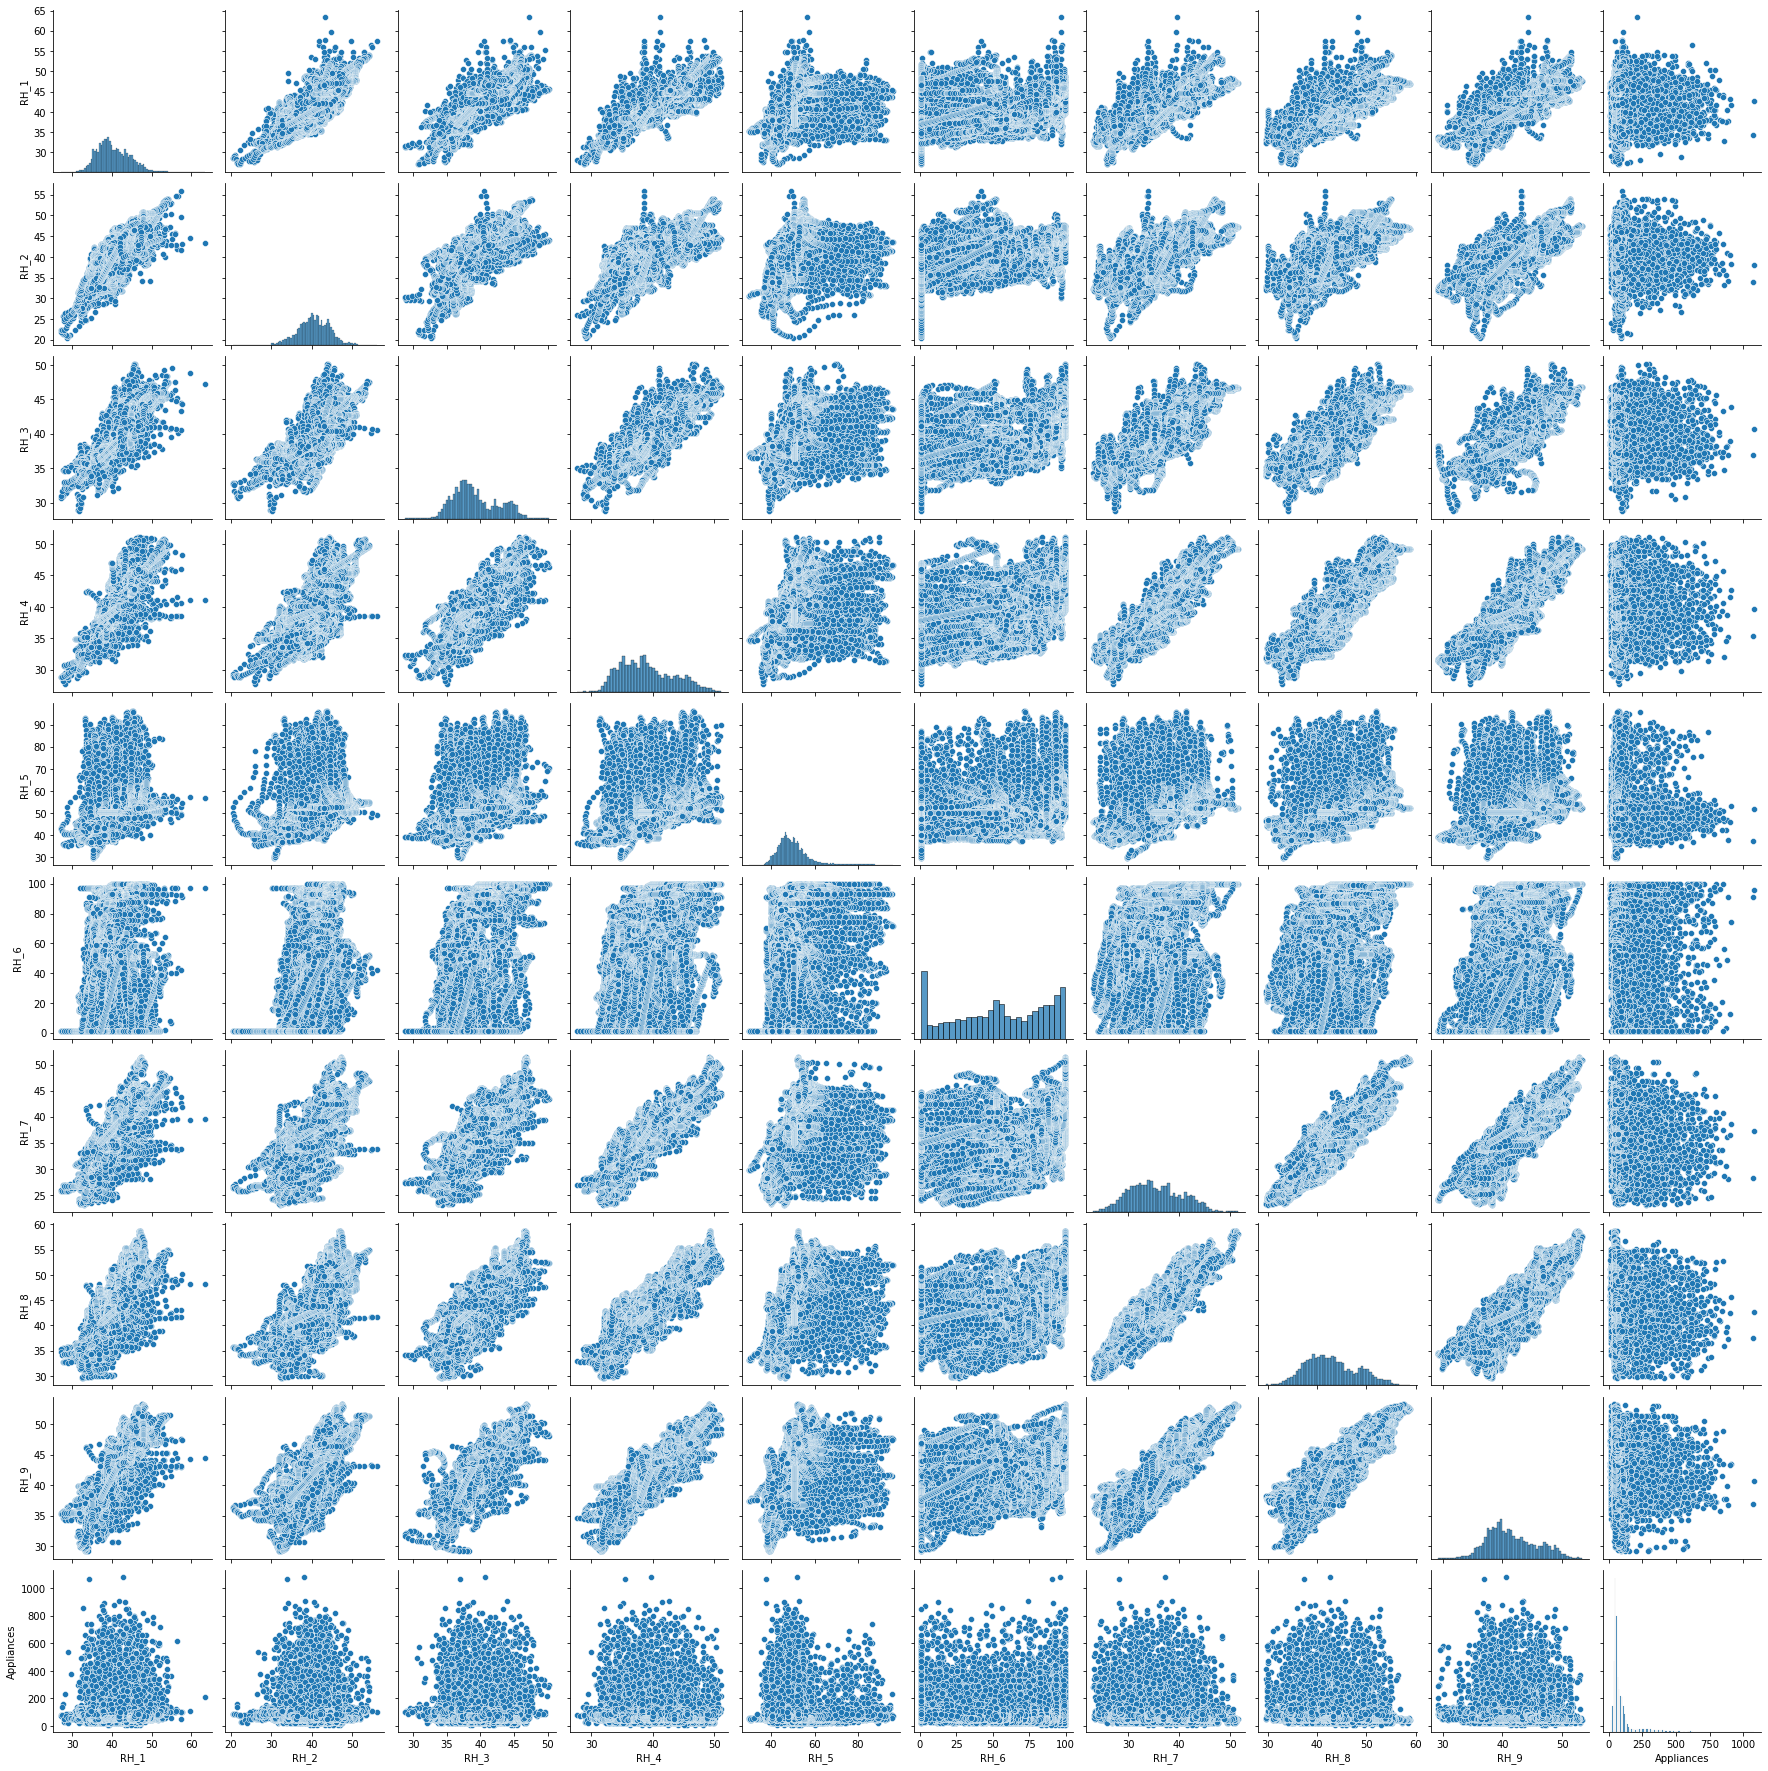

In [ ]:
sns.pairplot(df[Humidity_columns+Target])

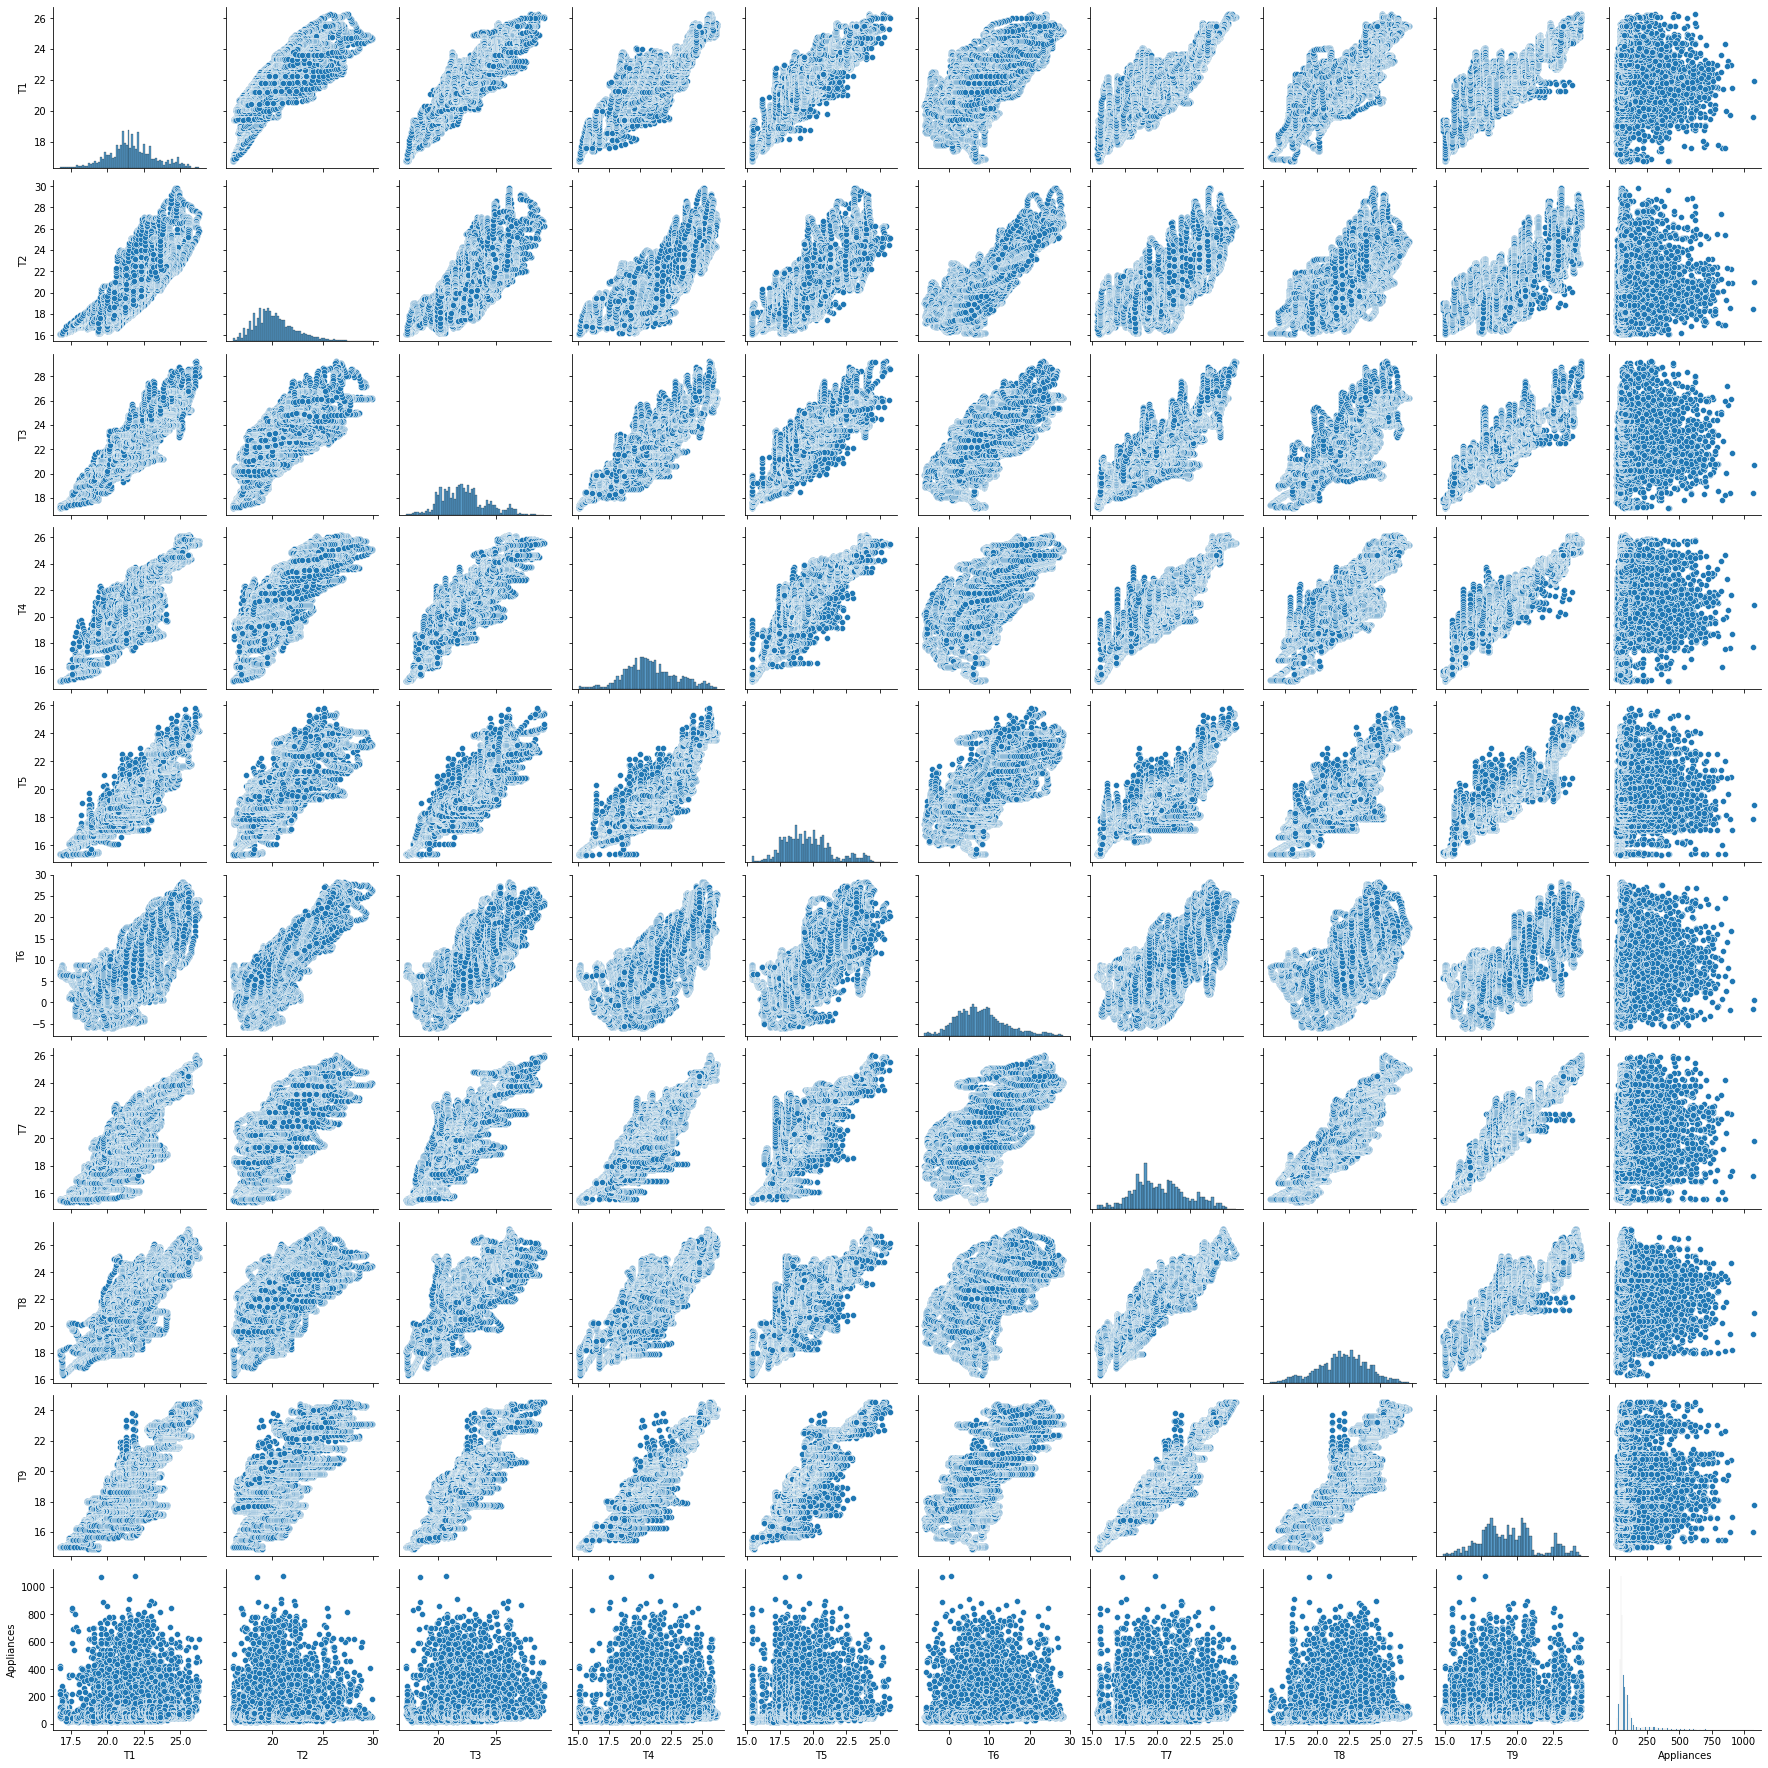

In [ ]:
sns.pairplot(df[Temperature_columns+Target])

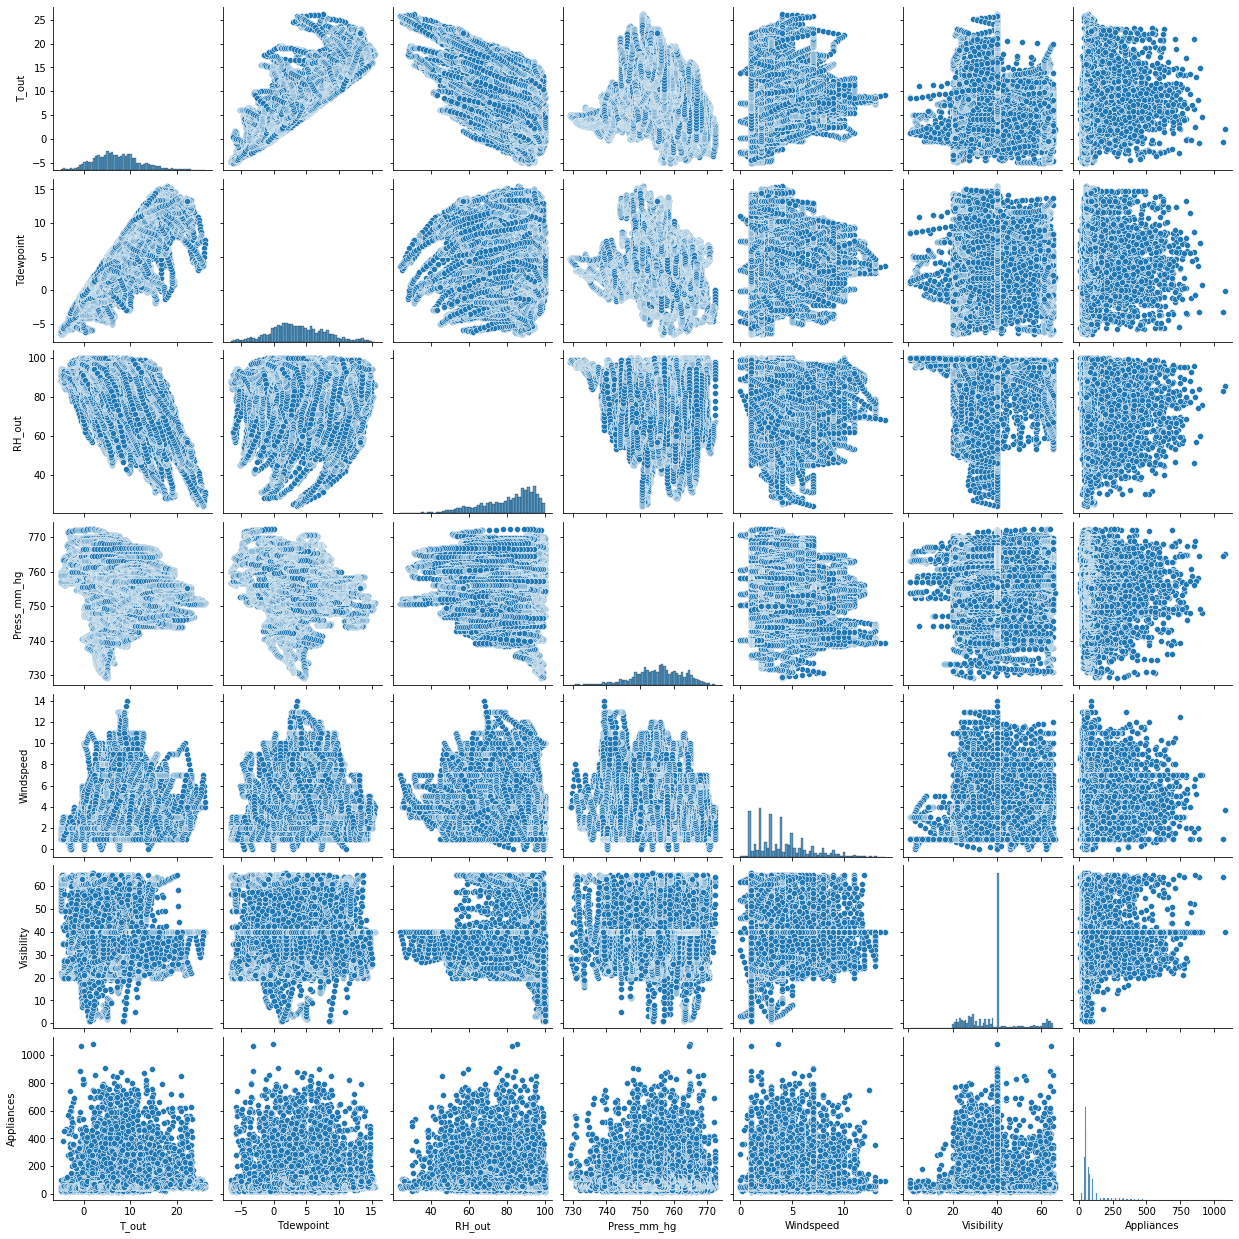

In [ ]:
sns.pairplot(df[Weather_columns+Target])

Boxplotting, jointplotting and scatterplotting

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


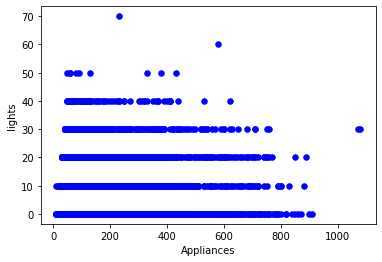

In [ ]:
df.plot(kind="scatter", x="Appliances", y="lights", color="blue",s=30)
plt.show()

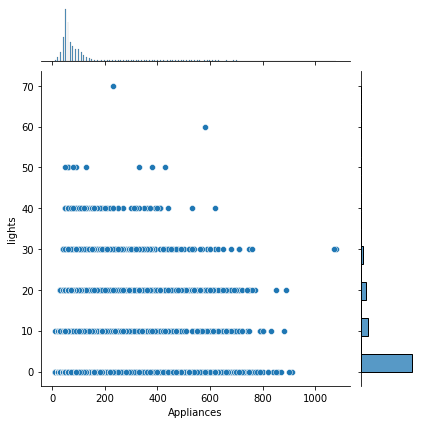

In [ ]:
sns.jointplot(data=df, x="Appliances", y="lights")

<Axes: >

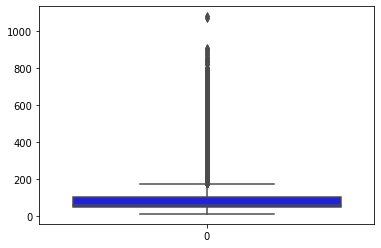

In [ ]:
data = df[df['Appliances'].between(df['Appliances'].quantile(.0), df['Appliances'].quantile(.99))]
sns.boxplot(df["Appliances"],color="blue")

Histogram with all the features

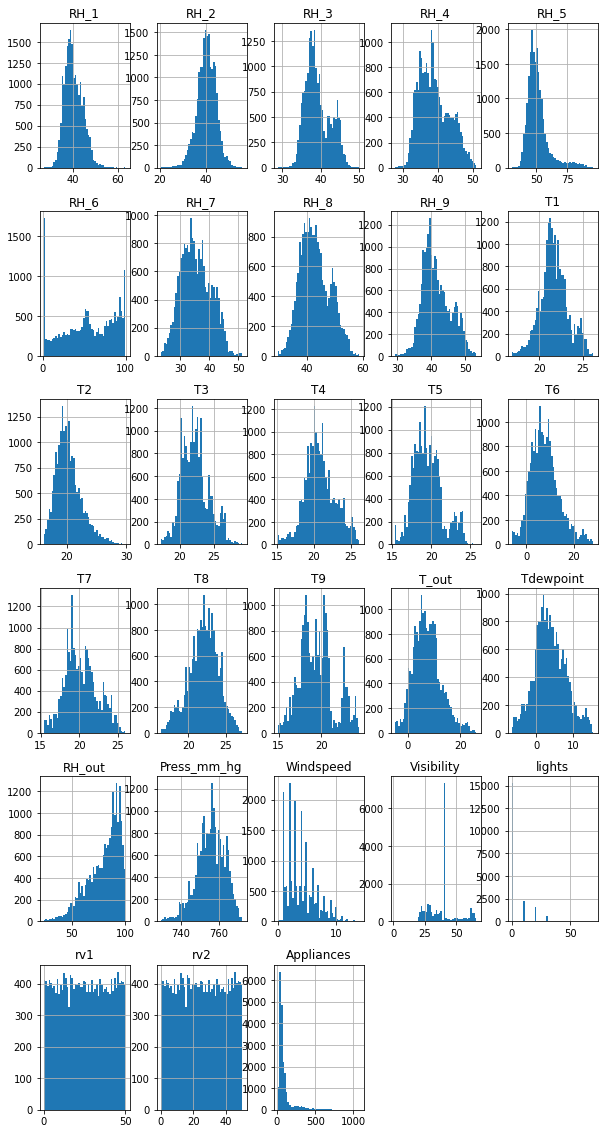

In [ ]:
df[Humidity_columns+Temperature_columns+Weather_columns+Light_columns+Random_columns+Target].hist(bins = 50, figsize=(10,20));

Checking the correlations between the Attributes Variables using Heatmap

<Axes: >

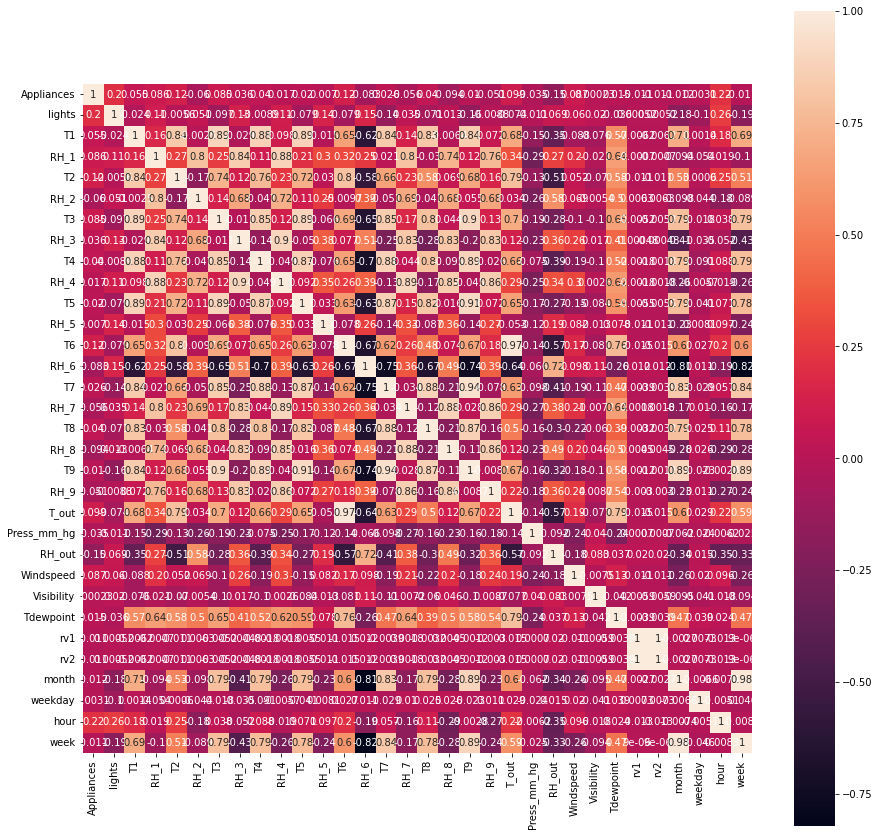

In [ ]:
hm = df.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(hm, annot=True, square=True)

In [ ]:
df

Appliances  lights         T1       RH_1         T2       RH_2  \
0              60      30  19.890000  47.596667  19.200000  44.790000   
1              60      30  19.890000  46.693333  19.200000  44.722500   
2              50      30  19.890000  46.300000  19.200000  44.626667   
3              50      40  19.890000  46.066667  19.200000  44.590000   
4              60      40  19.890000  46.333333  19.200000  44.530000   
...           ...     ...        ...        ...        ...        ...   
19730         100       0  25.566667  46.560000  25.890000  42.025714   
19731          90       0  25.500000  46.500000  25.754000  42.080000   
19732         270      10  25.500000  46.596667  25.628571  42.768571   
19733         420      10  25.500000  46.990000  25.414000  43.036000   
19734         430      10  25.500000  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4  ...     RH_out  Windspeed  \
0      19.790000  44.730000  19.000000  45.566667  ...  92.000000   7.000000   
1      19.790000  44.790000  19.000000  45.992500  ...  92.000000   6.666667   
2      19.790000  44.933333  18.926667  45.890000  ...  92.000000   6.333333   
3      19.790000  45.000000  18.890000  45.723333  ...  92.000000   6.000000   
4      19.790000  45.000000  18.890000  45.530000  ...  92.000000   5.666667   
...          ...        ...        ...        ...  ...        ...        ...   
19730  27.200000  41.163333  24.700000  45.590000  ...  55.666667   3.333333   
19731  27.133333  41.223333  24.700000  45.590000  ...  56.000000   3.500000   
19732  27.050000  41.690000  24.700000  45.730000  ...  56.333333   3.666667   
19733  26.890000  41.290000  24.700000  45.790000  ...  56.666667   3.833333   
19734  26.823333  41.156667  24.700000  45.963333  ...  57.000000   4.000000   

       Visibility  Tdewpoint        rv1        rv2  month  weekday  hour  week  
0       63.000000   5.300000  13.275433  13.275433      1        0    17     2  
1       59.166667   5.200000  18.606195  18.606195      1        0    17     2  
2       55.333333   5.100000  28.642668  28.642668      1        0    17     2  
3       51.500000   5.000000  45.410389  45.410389      1        0    17     2  
4       47.666667   4.900000  10.084097  10.084097      1        0    17     2  
...           ...        ...        ...        ...    ...      ...   ...   ...  
19730   23.666667  13.333333  43.096812  43.096812      5        4    17    21  
19731   24.500000  13.300000  49.282940  49.282940      5        4    17    21  
19732   25.333333  13.266667  29.199117  29.199117      5        4    17    21  
19733   26.166667  13.233333   6.322784   6.322784      5        4    17    21  
19734   27.000000  13.200000  34.118851  34.118851      5        4    18    21  

[19735 rows x 32 columns]

### 3. Implement prediction models

In [ ]:
x_data = df.drop(columns=['Appliances']).copy()
y_data = df[['Appliances']].copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Splitting the Train and Test data into 80-20.
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)

In [ ]:
# Scale the data
sc = StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)
y_train_sc=sc.fit_transform(y_train)
y_test_sc=sc.transform(y_test)

### 4. Train prediction models

###Random Forest Regressor

Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees.  The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(n_estimators = 100, random_state=0)
RandomForest.fit(X_train,y_train)

<ipython-input-32-d85bfbc1a697>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest.fit(X_train,y_train)


RandomForestRegressor(random_state=0)

In [ ]:
score1 = RandomForest.score(X_train, y_train)
print(score1)

0.9364242530103019


In [ ]:
score2 = RandomForest.score(X_test,y_test)
print(score2)

0.5112957120921602


In [ ]:
Y_Pred = RandomForest.predict(X_test)
print(Y_Pred)

[230.9  46.3 258.  ...  44.5 217.1  97.8]


###Multiple Linear Regression

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable

In [ ]:
from sklearn import linear_model
Mlinearregression = linear_model.LinearRegression()
Mlinearregression.fit(X_train,y_train)


LinearRegression()

In [ ]:
score3 = Mlinearregression.score(X_train, y_train)
print(score3)

0.173754330074272


In [ ]:
score4 = Mlinearregression.score(X_test, y_test)
print(score4)

0.15414454546873224


###Support Vector Machine

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane

In [ ]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
svm = SVC(C=1.0, random_state=1, kernel='linear')
svm.fit(X_train_std,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=1)

In [ ]:
score5 = svm.score(X_train_std,y_train)
print(score5)

0.26216113503927035


In [ ]:
score6 = svm.score(X_test_std,y_test)
print(score6)

0.2470230554851786


In [ ]:
y_pred = svm.predict(X_test_std)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.247


###Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

In [ ]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(C=100.0, random_state=1,solver='lbfgs',multi_class='ovr')
Lr.fit(X_train_std, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [ ]:
score7 = Lr.score(X_train_std,y_train)
print(score7)

0.2690651127438561


In [ ]:
score8 = Lr.score(X_test_std,y_test)
print(score8)

0.25335697998479856


In [ ]:
y_predict = Lr.predict(X_test_std)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.253


###Gradient Boosting Machine

Gradient Boosting Machine (GBM) is one of the most popular forward learning ensemble methods in machine learning. It is a powerful technique for building predictive models for regression and classification tasks.

GBM helps us to get a predictive model in form of an ensemble of weak prediction models such as decision trees. Whenever a decision tree performs as a weak learner then the resulting algorithm is called gradient-boosted trees.

It enables us to combine the predictions from various learner models and build a final predictive model having the correct prediction.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_params = {'n_estimators': 1000,
          'max_depth': 10,
          'min_samples_split': 5,
          'learning_rate': 0.05,
}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train_std,y_train)
print("Model Accuracy: %.3f" %gbr.score(X_test_std,y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Accuracy: 0.544


In [ ]:
score9 = gbr.score(X_train_std,y_train)
print(score9)

0.9966268077086584


In [ ]:
score10 = gbr.score(X_test_std,y_test)
print(score10)

0.5438916219917053


In [ ]:
Y_Pred1=gbr.predict(X_test_std)
print(Y_Pred1)

[212.79340615  41.8812116  247.46794549 ...  58.34018231 260.80546778
  99.08764609]


### 5. Test predictin models and show results

### Random Forest

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Y_Pred)
print(mse)
rmse = mse**.5
print(rmse)

5567.362596909044
74.614761253448


In [ ]:
from sklearn.metrics import mean_poisson_deviance
mean_poisson_deviance(y_test, Y_Pred)

25.31211811459813

In [ ]:
from sklearn.metrics import d2_absolute_error_score
d2_absolute_error_score(y_test, Y_Pred)

0.32360988875154495

In [ ]:
from sklearn.metrics import d2_tweedie_score
d2_tweedie_score(y_test, Y_Pred)

0.5112957120921602

### Gradient Boosting Machine

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Y_Pred1)
print(mse)
rmse = mse**.5
print(rmse)

5196.027100010013
72.08347314058898


In [ ]:
from sklearn.metrics import d2_absolute_error_score
d2_absolute_error_score(y_test, Y_Pred1)

0.3444197791594027

In [ ]:
from sklearn.metrics import d2_tweedie_score
d2_tweedie_score(y_test, Y_Pred1)

0.5438916219917053

In [ ]:
from pandas import DataFrame
train_error=[score1,score3,score5,score7,score9]
test_error=[score2,score4,score6,score8,score10]

col={'Train Score':train_error,'Test Score':test_error}
models=['Random forest','Multiple Linear Regression','Support Vector Machine','Logistic Regression','Gradient Boosting Machine']
df=DataFrame(data=col,index=models)
df

Train Score  Test Score
Random forest                  0.936424    0.511296
Multiple Linear Regression     0.173754    0.154145
Support Vector Machine         0.262161    0.247023
Logistic Regression            0.269065    0.253357
Gradient Boosting Machine      0.996627    0.543892

<Axes: >

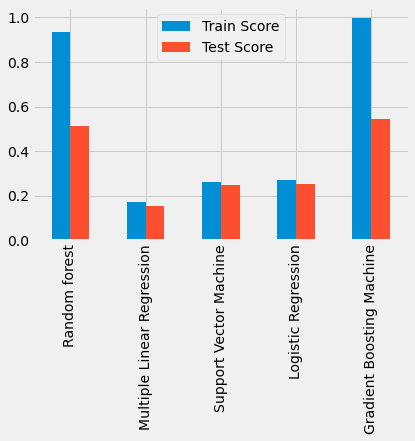

In [ ]:
df.plot(kind='bar')

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

-> For this assignment I have used 5 prediction models namely: Gradient Boosting Machine, Random Forest, Support Vector Machine, Logistic regression and Multiple Linear Regression.

-> According to my results, for the given regression problem and given dataset it is best to use Gradient Boosting Machine or GBM for prediction of Energy Consumption which also matches the authors results.

-> The following table shows the results:

| Model | Train Score | Test Score |
| --- | --- | --- |
| Gradient Boosting Machine| 0.9966 | 0.5438 |
| Logistic Regression  | 0.2690 | 0.2533 |
| Multiple Linear Regression | 0.1737 | 0.1541 |
| Random Forest | 0.9364 | 0.5112 |
| Support Vector Machine | 0.2621 | 0.2470 |

-> Gradient Boosting Machine (GBM) is one of the most popular forward learning ensemble methods in machine learning. GBM helps us to get a predictive model in form of an ensemble of weak prediction models such as decision trees. Whenever a decision tree performs as a weak learner then the resulting algorithm is called gradient-boosted trees. It enables us to combine the predictions from various learner models and build a final predictive model having the correct prediction.

So as Gradient Boosting Machine combines the prediction of all the weak learner it is able to correctly predict the outcome.

Random Forest also works on similar concepts and was able to give similar results.

### 7. Reflect on what you have learned by completing this assignment

1. Regression techniques using Ensemble Model

2. Gradient Boosting, what is boosting and bootstraping.

3. Understanding the difference Linear Regression and Multiple Linear Regression.

4. How to choose the target variable and apply suitable machine learning teachinques surrounding that target variable.

5. Understanding what hyperplane is and how Support Vector Machine works

6. Data Visualisation and Analysis Techniques

7. Metrics and scoring for a regression problem.

### 8. References

Metrics and scoring: quantifying the quality of predictions: https://scikit-learn.org/stable/modules/model_evaluation.html#visual-evaluation-of-regression-models

Gradient Boosting Machine
1. https://www.javatpoint.com/gbm-in-machine-learning

2. https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#gradient-boosting-regression

Logistic Regression:
1. https://www.javatpoint.com/logistic-regression-in-machine-learning

Support Vector Machine:
1. https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

2. https://scikit-learn.org/stable/modules/svm.html

Multiple Linear Regression:
1. https://www.scribbr.com/statistics/multiple-linear-regression/#:~:text=What%20is%20multiple%20linear%20regression,variables%20using%20a%20straight%20line.

Random Forest:
1. https://www.geeksforgeeks.org/random-forest-regression-in-python/

2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
